# Ridge and Lasso Regression Model

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## Loading Dataset

In [30]:
data = pd.read_csv("/Users/anshumaansoni/PycharmProjects/Machine-Learning/Datasets/Real estate.csv")
display(data)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [31]:
X = data[["X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
y = data["Y house price of unit area"]

## Splitting the Dataset into Train and Test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2342)

## Performing Ridge Regression

In [33]:
alpha_values = [0, 0.1, 1, 10, 100]

# Display coefficients for specific alpha values
for alpha in alpha_values:
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)

    print(f"Alpha : {alpha}")
    print(pd.Series(ridge.coef_, index=X.columns))
    print("-" * 40)

# Generate coefficient path for visualization
alphas = np.logspace(-2, 3, 50)
coefficient_path = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefficient_path.append(ridge.coef_)

coefficient_path = np.array(coefficient_path)

# Evaluate best model on test data
best_ridge = Ridge(alpha=1)
best_ridge.fit(X_train, y_train)
ridge_pred = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"\nRidge Regression - Test MSE: {ridge_mse:.4f}")

Alpha : 0
X4 number of convenience stores      1.221282
X5 latitude                        363.188102
X6 longitude                       233.801405
dtype: float64
----------------------------------------
Alpha : 0.1
X4 number of convenience stores      1.961143
X5 latitude                        112.515919
X6 longitude                       110.634854
dtype: float64
----------------------------------------
Alpha : 1
X4 number of convenience stores     2.350963
X5 latitude                        16.166669
X6 longitude                       18.179133
dtype: float64
----------------------------------------
Alpha : 10
X4 number of convenience stores    2.407497
X5 latitude                        1.697377
X6 longitude                       1.944697
dtype: float64
----------------------------------------
Alpha : 100
X4 number of convenience stores    2.340380
X5 latitude                        0.174320
X6 longitude                       0.200714
dtype: float64
-------------------------------

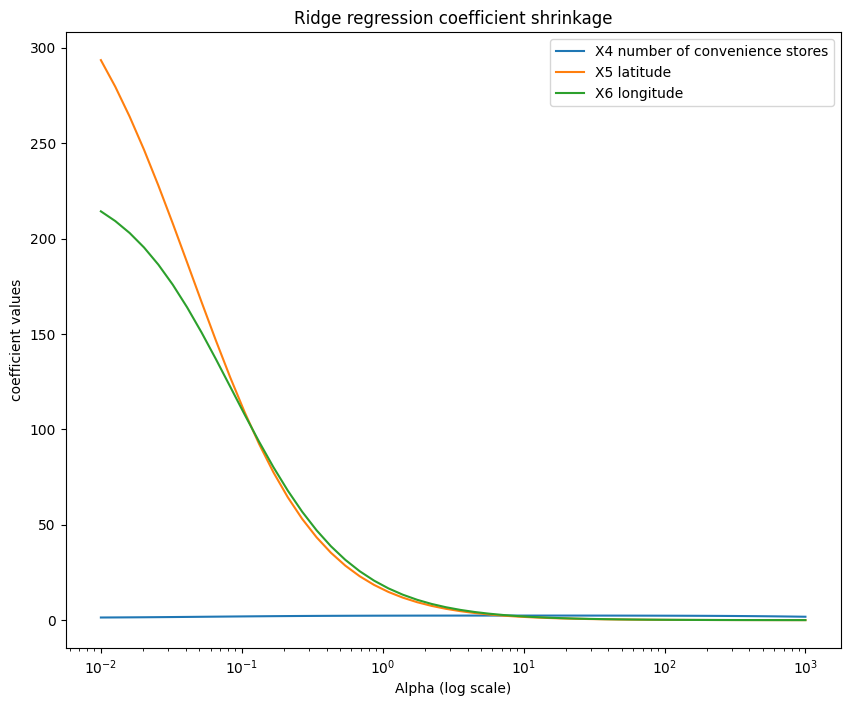

In [34]:
plt.figure(figsize=(10,8))
plt.plot(alphas, coefficient_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("coefficient values")
plt.title("Ridge regression coefficient shrinkage")
plt.legend(X.columns)
plt.show()

## Performing Lasso Regression

In [35]:
alpha_values = [0, 0.1, 1, 10, 100]

# Display coefficients for specific alpha values
for alpha in alpha_values:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    print(f"Alpha : {alpha}")
    print(pd.Series(lasso.coef_, index=X.columns))
    print("-" * 40)

# Generate coefficient path for visualization
alphas = np.logspace(-2, 3, 50)
coefficient_path = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefficient_path.append(lasso.coef_)

coefficient_path = np.array(coefficient_path)

# Evaluate best model on test data
best_lasso = Lasso(alpha=0.1)
best_lasso.fit(X_train, y_train)
lasso_pred = best_lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"\nLasso Regression - Test MSE: {lasso_mse:.4f}")

Alpha : 0
X4 number of convenience stores      1.221282
X5 latitude                        363.188102
X6 longitude                       233.801405
dtype: float64
----------------------------------------
Alpha : 0.1
X4 number of convenience stores    2.411943
X5 latitude                        0.000000
X6 longitude                       0.000000
dtype: float64
----------------------------------------
Alpha : 1
X4 number of convenience stores    2.307012
X5 latitude                        0.000000
X6 longitude                       0.000000
dtype: float64
----------------------------------------
Alpha : 10
X4 number of convenience stores    1.257707
X5 latitude                        0.000000
X6 longitude                       0.000000
dtype: float64
----------------------------------------
Alpha : 100
X4 number of convenience stores    0.0
X5 latitude                        0.0
X6 longitude                       0.0
dtype: float64
----------------------------------------

Lasso Regress

/Users/anshumaansoni/PycharmProjects/Machine-Learning/.venv/lib/python3.12/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/anshumaansoni/PycharmProjects/Machine-Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/anshumaansoni/PycharmProjects/Machine-Learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+04, tolerance: 5.976e+00
Linear regression models with a zero l1 penalization strength are more efficien

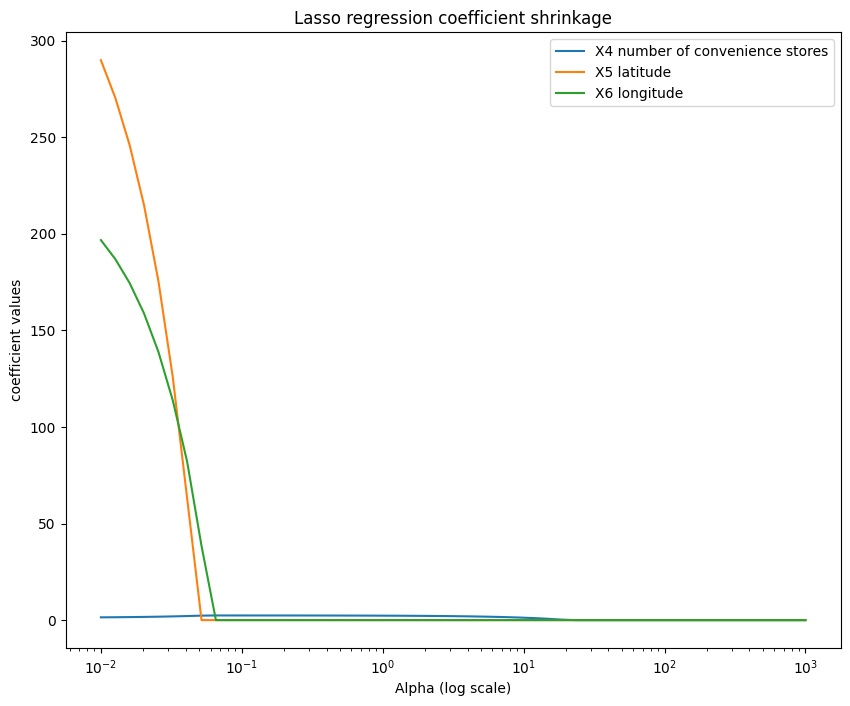

In [36]:
plt.figure(figsize=(10,8))
plt.plot(alphas, coefficient_path)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("coefficient values")
plt.title("Lasso regression coefficient shrinkage")
plt.legend(X.columns)
plt.show()

## Implementing GridSearch Hyperparameter Tuning for Ridge Regression

In [37]:
param_grid = {"alpha": np.logspace(-3, 2, 20)}

ridge_cv = GridSearchCV(
    Ridge(max_iter=100),
    param_grid=param_grid,
    scoring="neg_mean_squared_error"
)

ridge_cv.fit(X_train, y_train)

print("Best alpha score for Ridge - ", ridge_cv.best_params_['alpha'])
best_ridge = ridge_cv.best_estimator_

Best alpha score for Ridge -  0.003359818286283781


## Implementing GridSearch Hyperparameter Tuning for Lasso Regression

In [38]:
param_grid = {"alpha": np.logspace(-3, 2, 20)}

lasso_cv = GridSearchCV(
    Lasso(max_iter=100),
    param_grid=param_grid,
    scoring="neg_mean_squared_error"
)

lasso_cv.fit(X_train, y_train)

print("Best alpha score for Lasso - ", lasso_cv.best_params_['alpha'])
best_lasso = lasso_cv.best_estimator_

Best alpha score for Lasso -  0.001


## Performing Predictions on Best Estimator

### Ridge

In [39]:
ridge_pred = best_ridge.predict(X_test)
print("Ridge MSE", mean_squared_error(y_test, ridge_pred))

Ridge MSE 89.95192993234981


### Lasso

In [40]:
lasso_pred = best_lasso.predict(X_test)
print("Lasso MSE", mean_squared_error(y_test, lasso_pred))

Lasso MSE 90.88481798067117


## Coefficients of Best Estimators

### Ridge

In [41]:
ridge_coef = best_ridge.coef_
print("Best coefficient are :")
display(ridge_coef)

Best coefficient are :


array([  1.28526737, 336.04870237, 227.31699569])

In [42]:
lasso_coef = best_lasso.coef_
print("Best coefficient are :")
display(lasso_coef)

Best coefficient are :


array([  1.24305971, 355.85550128, 230.09384554])

## Plotting Regression line over Actual Data

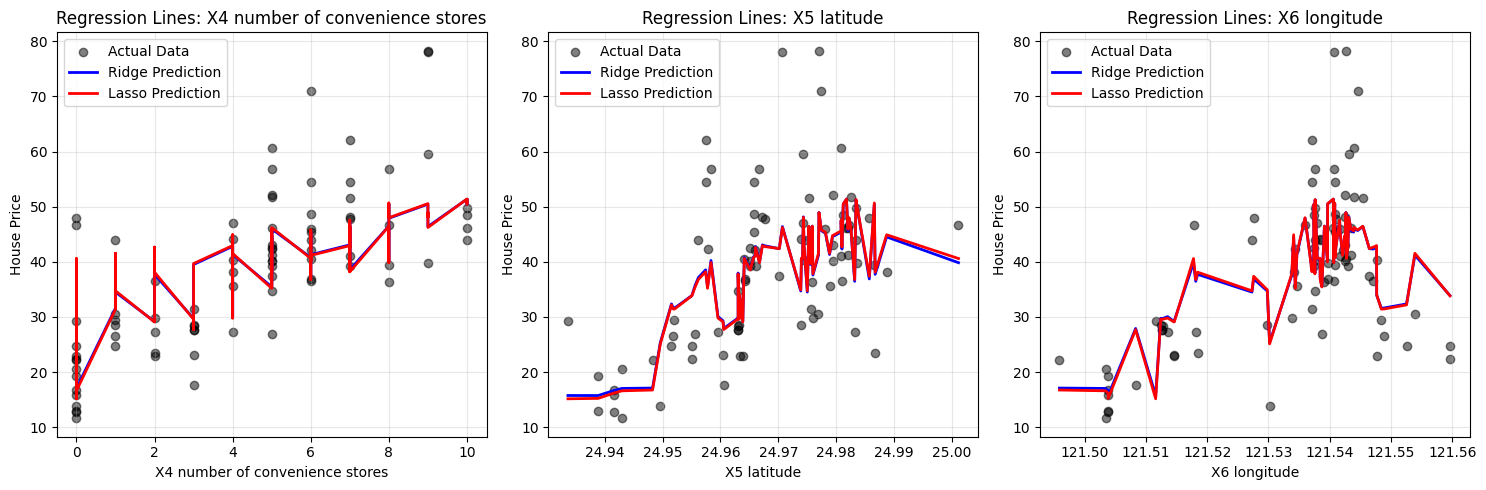

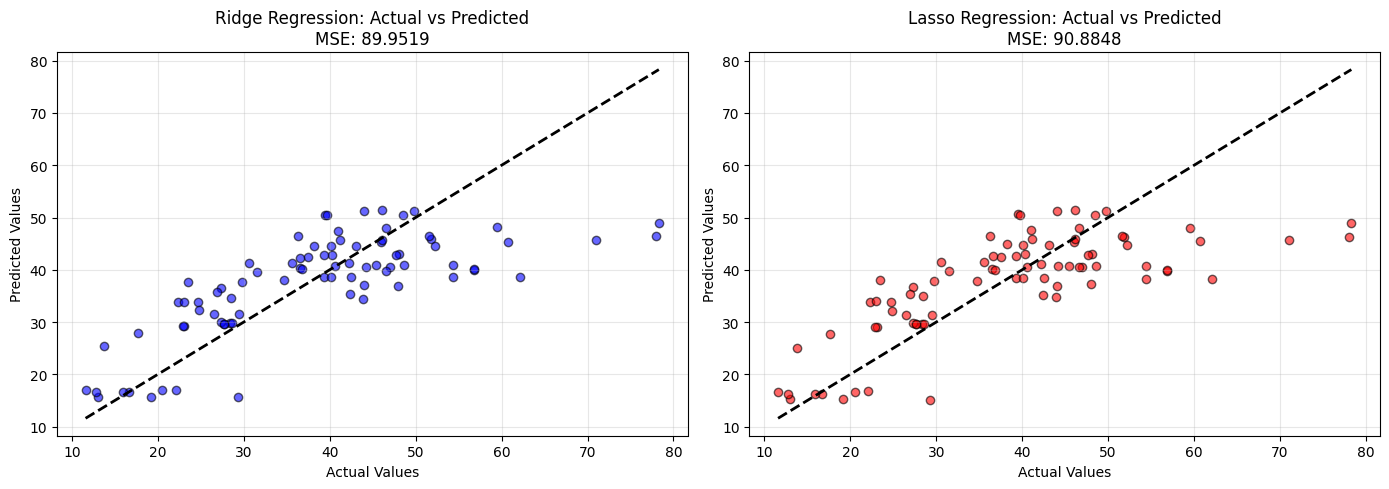

In [43]:
# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

features = X.columns
for idx, feature in enumerate(features):
    # Sort data for plotting smooth lines
    X_feature = X_test[feature].values.reshape(-1, 1)
    X_sorted_indices = np.argsort(X_test[feature].values)
    X_sorted = X_test[feature].values[X_sorted_indices].reshape(-1, 1)

    # For plotting with one feature, we need to handle multiple features in the model
    # Create a base feature matrix with mean values
    X_test_plot = X_test.iloc[X_sorted_indices].copy()

    # Get predictions
    ridge_pred_plot = best_ridge.predict(X_test_plot)
    lasso_pred_plot = best_lasso.predict(X_test_plot)
    y_test_plot = y_test.iloc[X_sorted_indices].values

    # Plot
    axes[idx].scatter(X_sorted, y_test_plot, alpha=0.5, label='Actual Data', color='black')
    axes[idx].plot(X_sorted, ridge_pred_plot, label='Ridge Prediction', color='blue', linewidth=2)
    axes[idx].plot(X_sorted, lasso_pred_plot, label='Lasso Prediction', color='red', linewidth=2)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('House Price')
    axes[idx].set_title(f'Regression Lines: {feature}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a comparison plot showing predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ridge Regression
axes[0].scatter(y_test, ridge_pred, alpha=0.6, color='blue', edgecolors='black')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Ridge Regression: Actual vs Predicted\nMSE: {mean_squared_error(y_test, ridge_pred):.4f}')
axes[0].grid(True, alpha=0.3)

# Lasso Regression
axes[1].scatter(y_test, lasso_pred, alpha=0.6, color='red', edgecolors='black')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Lasso Regression: Actual vs Predicted\nMSE: {mean_squared_error(y_test, lasso_pred):.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
